# Validación del modelo
## dividir el dataset en conjunto de entrenamiento y testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
np.random.seed(1)
a = np.random.randn(len(data))  # creamos una distribución normal del largo de los datos

(array([ 4.,  5., 16., 25., 44., 44., 33., 17.,  7.,  5.]),
 array([-2.43483776, -1.93852142, -1.44220507, -0.94588872, -0.44957238,
         0.04674397,  0.54306032,  1.03937667,  1.53569301,  2.03200936,
         2.52832571]),
 <a list of 10 Patch objects>)

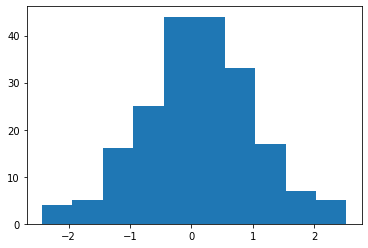

In [5]:
plt.hist(a)

In [6]:
check = (a<0.8)                           #nos quedaremos con el 80% de los datos para entrenamiento y 20 para test
training = data[check]
testing  = data[~check]
len(training),len(testing)

(155, 45)

In [7]:
lm=smf.ols(formula="Sales~TV+Radio", data= training).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     576.9
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           1.03e-71
Time:                        20:31:47   Log-Likelihood:                -305.94
No. Observations:                 155   AIC:                             617.9
Df Residuals:                     152   BIC:                             627.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0866      0.349      8.833      0.000       2.396       3.777
TV             0.0445      0.002     26.768      0.000       0.041       0.048
Radio          0.1872      0.009     20.178      0.000       0.169       0.206
==============================================================================
Omnibus:                       52.302   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.679
Skew:                          -1.382   Prob(JB):                     2.09e-30
Kurtosis:                       6.677   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

EL modelo queda como **Sales = 3.0866 + 0.0445*tv +0.1872*radio**

# validacion del modelo con el conjunto de testing

In [8]:
sales_pred = lm.predict(testing)
sales_pred

0      20.398942
4      13.150927
6      11.785307
10      7.112771
14     18.325020
21     14.601398
22      6.650672
24      8.216872
38     10.002700
43     13.862554
47     21.527594
56      8.672377
57     12.739741
59     17.982033
61     22.704168
66      9.093542
67     11.997676
68     18.795239
73      9.909729
77     13.782575
89     16.920066
90      9.977908
101    23.067229
112    13.785306
118    15.586569
122    13.499838
123    15.040299
125     9.174682
126    10.716648
129     7.984437
138     9.848472
142    19.110684
152    16.238529
153    18.139156
166    10.922519
168    17.086468
171    14.316851
172     7.721699
176    19.790043
183    23.930200
190    12.538607
192     4.619342
193    18.369607
198    23.565049
199    15.020933
dtype: float64

In [9]:
SSD=sum((testing["Sales"]-sales_pred)**2)
SSD

89.47285867967575

In [10]:
RSE = np.sqrt(SSD/(len(data)-2-1))
RSE

0.673926514994452

In [11]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error*100

4.693081580741308

**El modelo que hemos creado no presenta overfiting es un buen modelo**